# Vehicle Detection and Counter Flask App

Next we will apply GaussianBlur to remove the noise from the image. Instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. 
It is done with the function, cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. 

Here we will dilate image. It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. 

Now we will perform Morphology transformation with kernel. MorphologyEx is used to find the difference between dilation and erosion of an image.
You may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.

Now we need car cascade to detect cars. So, we first need to upload them to collab and then specify the path to car_cascade_src. OpenCV provides a training method (see Cascade Classifier Training) or pretrained models, that can be read using cv2.CascadeClassifier() method. We need to detect multiple objects i.e. cars so we will use detectMultiScale. Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

Now we will use the above returned contours and draw a rectangle around detected cars. Here we will see that it will create the rectangle with red boundary around each and every car it detects.

Now we will use another image i.e. bus image and we will fetch this image from the internet. We will resize the image and store it as a numpy array and also convert it into grayscale.



## Load the main libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
import cv2

## Steps of identifying vehicles in an image

# Step 1: Download and read an image

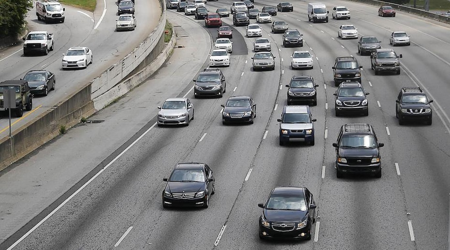

In [2]:
image = Image.open('./images/cars.png')
image = image.resize((450,250))
image

## Step 2: Convert the image into grayscale

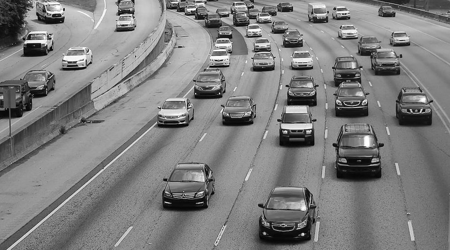

In [3]:
image_array = np.array(image)
image_gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
Image.fromarray(image_gray)

### • This is done because many opencv functions expect the images to be in grayscale form

## Step 3: Blur the image with a Gaussian kernel

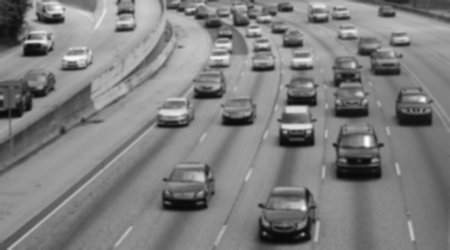

In [4]:
image_blur = cv2.GaussianBlur(image_gray, (5,5), 0)
Image.fromarray(image_blur)

### • Blurring is useful for removing noise from an image

## Step 4: Dilate the image

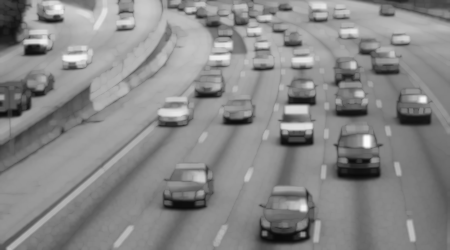

In [5]:
image_dilated = cv2.dilate(image_blur, np.ones((3,3)))
Image.fromarray(image_dilated)

### • Here, a pixel element is '1' if atleast one pixel under the kernel is '1' 
### • So it increases the white region in the image or size of foreground object increases

## Step 5: Closing transformation of the image

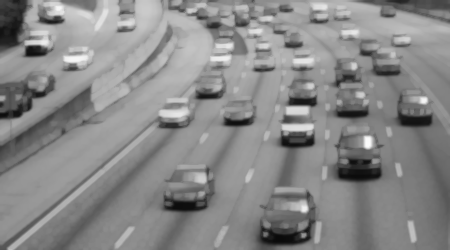

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
image_closing = cv2.morphologyEx(image_dilated, cv2.MORPH_CLOSE, kernel)
Image.fromarray(image_closing)

### • Closing is dilation followed by erosion of an image.
### • It is useful in closing small holes inside the foreground objects, or small black points on the object.

## Step 6: Identify the car objects using a Cascade Classifier

In [8]:
car_cascade_src = './models/cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(image_closing, 1.1, 1)
print(f"{len(cars)} cars found in the image.")

22 cars found in the image.


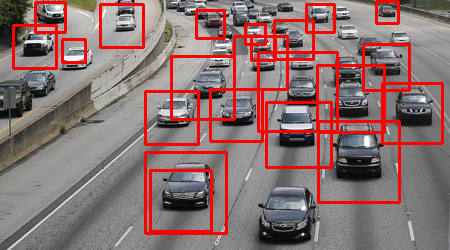

In [9]:
image_final = image_array.copy()
for x, y, w, h in cars:
    cv2.rectangle(image_final, (x,y), (x+w, y+h), (255,0,0), 2)

Image.fromarray(image_final)

### • Cascade Classifier is a machine learning based approach where a cascade function is trained from a lot of positive and negative images
### • It is then used to detect objects in other images

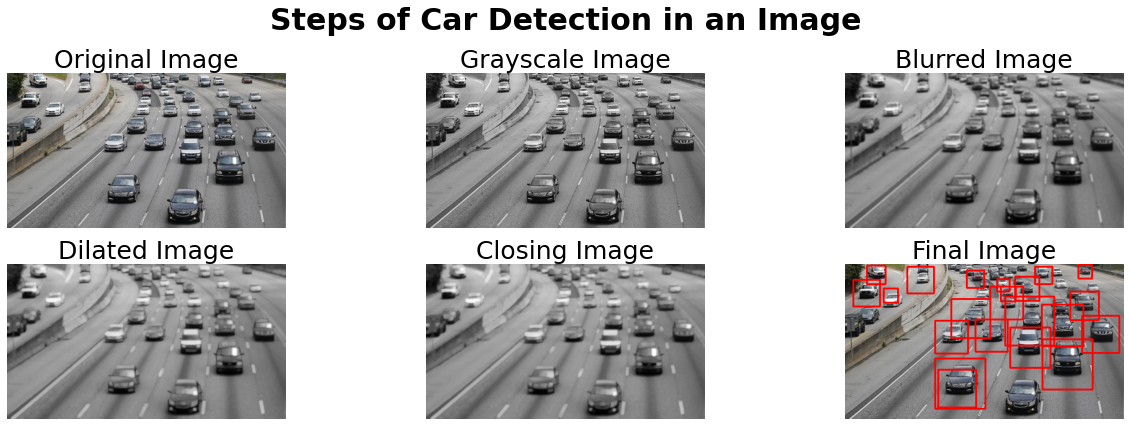

In [10]:
images = [image_array, image_gray, image_blur, image_dilated, image_closing, image_final]
titles = ['Original Image', 'Grayscale Image', 'Blurred Image', 'Dilated Image', 'Closing Image', 'Final Image']
index = 0

fig, ax = plt.subplots(2, 3, figsize=(18,6))
for x in range(2):
    for y in range(3):
        ax[x,y].imshow(images[index], cmap='gray')
        ax[x,y].set_title(titles[index], fontsize=25)
        ax[x,y].set_axis_off()
        index += 1
fig.suptitle('Steps of Car Detection in an Image', fontsize=30, fontweight='semibold')
fig.tight_layout()

## Similarly, we will perform the same operations for buses with a bus cascade classifier

In [26]:
image2 = Image.open('./images/bus.jpg')
image2 = image2.resize((450,250))
image_arr_2 = np.array(image2)
gray2 = cv2.cvtColor(image_arr_2, cv2.COLOR_RGB2GRAY)

In [33]:
bus_cascade_src = './models/Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(gray2, 1.1, 1)
print(len(bus))

1


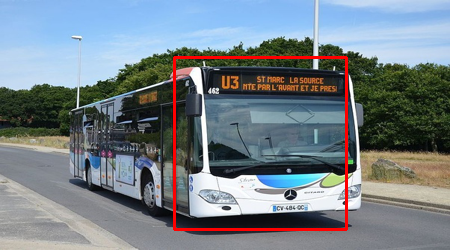

In [35]:
for x, y, w, h in bus:
    cv2.rectangle(image_arr_2, (x,y), (x+w, y+h), (255,0,0), 2)

Image.fromarray(image_arr_2)

## Vehicle detection in videos

In [56]:
def car_detect(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 1)
    
    for x, y, w, h in cars:
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,255), 2)
    return img
    

In [57]:
cap = cv2.VideoCapture(video_src)
cnt = 0
while True:
    ret, frame = cap.read()
    if ret == False:
        break
        
    frame = car_detect(frame)
    cv2.imshow('car_detect', frame)
    if cv2.waitKey(20) == 27:
        break
    
cv2.destroyAllWindows()
cap.release()
    
        